In [154]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px

import os

from scipy.stats import linregress
from scipy import stats

In [97]:
# read in csvs
circuits = pd.read_csv(r"C:/Users/tsswi/OneDrive/Desktop/DU_Classwork/Formula_1_csvs/circuits.csv", na_values=r'\N')
constructor_results = pd.read_csv(r"C:/Users/tsswi/OneDrive/Desktop/DU_Classwork/Formula_1_csvs/constructor_results.csv", na_values=r'\N')
constructor_standings = pd.read_csv(r"C:/Users/tsswi/OneDrive/Desktop/DU_Classwork/Formula_1_csvs/constructor_standings.csv", na_values=r'\N')
constructors = pd.read_csv(r"C:/Users/tsswi/OneDrive/Desktop/DU_Classwork/Formula_1_csvs/constructors.csv", na_values=r'\N')
driver_standings = pd.read_csv(r"C:/Users/tsswi/OneDrive/Desktop/DU_Classwork/Formula_1_csvs/driver_standings.csv", na_values=r'\N')
drivers = pd.read_csv(r"C:/Users/tsswi/OneDrive/Desktop/DU_Classwork/Formula_1_csvs/drivers.csv", na_values=r'\N')
pit_stops = pd.read_csv(r"C:/Users/tsswi/OneDrive/Desktop/DU_Classwork/Formula_1_csvs/pit_stops.csv", na_values=r'\N')
qualifying = pd.read_csv(r"C:/Users/tsswi/OneDrive/Desktop/DU_Classwork/Formula_1_csvs/qualifying.csv", na_values=r'\N')
races = pd.read_csv(r"C:/Users/tsswi/OneDrive/Desktop/DU_Classwork/Formula_1_csvs/races.csv", na_values=r'\N')
seasons = pd.read_csv(r"C:/Users/tsswi/OneDrive/Desktop/DU_Classwork/Formula_1_csvs/seasons.csv", na_values=r'\N')
sprint_results = pd.read_csv(r"C:/Users/tsswi/OneDrive/Desktop/DU_Classwork/Formula_1_csvs/sprint_results.csv", na_values=r'\N')
status = pd.read_csv(r"C:/Users/tsswi/OneDrive/Desktop/DU_Classwork/Formula_1_csvs/status.csv", na_values=r'\N')
results = pd.read_csv(r"C:/Users/tsswi/OneDrive/Desktop/DU_Classwork/Formula_1_csvs/results.csv/results.csv", na_values=r'\N')

In [98]:
driver_standings

,driverStandingsId,raceId,driverId,points,position,positionText,wins
0,1,18,1,10.0,1,1,1
1,2,18,2,8.0,2,2,0
2,3,18,3,6.0,3,3,0
3,4,18,4,5.0,4,4,0
4,5,18,5,4.0,5,5,0
...,...,...,...,...,...,...,...
33897,71841,1098,840,0.0,16,16,0
33898,71842,1098,852,0.0,17,17,0
33899,71843,1098,830,0.0,18,18,0
33900,71844,1098,856,0.0,19,19,0


In [99]:
results

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId
0,1,18,1,1,22.0,1,1.0,1,1,10.0,58,1:34:50.616,5690616.0,39.0,2.0,1:27.452,218.300,1
1,2,18,2,2,3.0,5,2.0,2,2,8.0,58,+5.478,5696094.0,41.0,3.0,1:27.739,217.586,1
2,3,18,3,3,7.0,7,3.0,3,3,6.0,58,+8.163,5698779.0,41.0,5.0,1:28.090,216.719,1
3,4,18,4,4,5.0,11,4.0,4,4,5.0,58,+17.181,5707797.0,58.0,7.0,1:28.603,215.464,1
4,5,18,5,1,23.0,3,5.0,5,5,4.0,58,+18.014,5708630.0,43.0,1.0,1:27.418,218.385,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25835,25841,1096,854,210,47.0,12,16.0,16,16,0.0,57,NaN,NaN,39.0,12.0,1:29.833,211.632,11
25836,25842,1096,825,210,20.0,16,17.0,17,17,0.0,57,NaN,NaN,40.0,20.0,1:31.158,208.556,11
25837,25843,1096,1,131,44.0,5,18.0,18,18,0.0,55,NaN,NaN,42.0,11.0,1:29.788,211.738,9
25838,25844,1096,849,3,6.0,20,19.0,19,19,0.0,55,NaN,NaN,45.0,14.0,1:30.309,210.517,130


In [100]:
# Rename columns for later merging 
circuits = circuits.rename(columns={'name':'circuitName','location':'circuitLocation','country':'circuitCountry','url':'circuitUrl'})
drivers = drivers.rename(columns={'nationality':'driverNationality','url':'driverUrl'})
drivers['driverName'] = drivers['forename']+' '+drivers['surname']
constructors = constructors.rename(columns={'name':'constructorName','nationality':'constructorNationality','url':'constructorUrl'})
pit_stops = pit_stops.rename(columns={'time':'pitTime'})

In [101]:
results.head()

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId
0,1,18,1,1,22.0,1,1.0,1,1,10.0,58,1:34:50.616,5690616.0,39.0,2.0,1:27.452,218.300,1
1,2,18,2,2,3.0,5,2.0,2,2,8.0,58,+5.478,5696094.0,41.0,3.0,1:27.739,217.586,1
2,3,18,3,3,7.0,7,3.0,3,3,6.0,58,+8.163,5698779.0,41.0,5.0,1:28.090,216.719,1
3,4,18,4,4,5.0,11,4.0,4,4,5.0,58,+17.181,5707797.0,58.0,7.0,1:28.603,215.464,1
4,5,18,5,1,23.0,3,5.0,5,5,4.0,58,+18.014,5708630.0,43.0,1.0,1:27.418,218.385,1


In [102]:
# locate the races and pit stops we need 
df = results.loc[results["raceId"].between(1052,1073)].copy()
df2 = pit_stops.loc[pit_stops["raceId"].between(1052, 1073)].copy()

In [103]:
# Replace weird '\\N' values as na's
#df.replace(to_replace = '\\N', value = 'NaN', inplace = True)
#df2.replace(to_replace = '\\N', value = 'NaN', inplace = True)

In [104]:
# this df is from Results and contains only the races we need 
df.head()

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId
24960,24966,1052,1,131,44.0,2,1.0,1,1,25.0,56,1:32:03.897,5523897.0,44.0,4.0,1:34.015,207.235,1
24961,24967,1052,830,9,33.0,1,2.0,2,2,18.0,56,+0.745,5524642.0,41.0,2.0,1:33.228,208.984,1
24962,24968,1052,822,131,77.0,3,3.0,3,3,16.0,56,+37.383,5561280.0,56.0,1.0,1:32.090,211.566,1
24963,24969,1052,846,1,4.0,7,4.0,4,4,12.0,56,+46.466,5570363.0,38.0,6.0,1:34.396,206.398,1
24964,24970,1052,815,9,11.0,0,5.0,5,5,10.0,56,+52.047,5575944.0,44.0,3.0,1:33.970,207.334,1


In [105]:
# change dtype for milliseconds
df.astype({"milliseconds": "float"})

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId
24960,24966,1052,1,131,44.0,2,1.0,1,1,25.0,56,1:32:03.897,5523897.0,44.0,4.0,1:34.015,207.235,1
24961,24967,1052,830,9,33.0,1,2.0,2,2,18.0,56,+0.745,5524642.0,41.0,2.0,1:33.228,208.984,1
24962,24968,1052,822,131,77.0,3,3.0,3,3,16.0,56,+37.383,5561280.0,56.0,1.0,1:32.090,211.566,1
24963,24969,1052,846,1,4.0,7,4.0,4,4,12.0,56,+46.466,5570363.0,38.0,6.0,1:34.396,206.398,1
24964,24970,1052,815,9,11.0,0,5.0,5,5,10.0,56,+52.047,5575944.0,44.0,3.0,1:33.970,207.334,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25395,25401,1073,849,3,6.0,16,NaN,R,16,0.0,50,NaN,NaN,30.0,15.0,1:29.293,212.912,3
25396,25402,1073,841,51,99.0,14,NaN,R,17,0.0,33,NaN,NaN,33.0,16.0,1:29.442,212.557,6
25397,25403,1073,847,3,63.0,17,NaN,R,18,0.0,26,NaN,NaN,23.0,19.0,1:30.647,209.732,6
25398,25404,1073,8,51,7.0,18,NaN,R,19,0.0,25,NaN,NaN,23.0,18.0,1:29.698,211.951,23


In [106]:
# This df is from pit stops and contains only the pit stop info relavant to the races we're analyzing 
df2.head()

,raceId,driverId,stop,lap,pitTime,duration,milliseconds
8030,1052,815,1,2,18:11:56,23.993,23993
8031,1052,842,1,4,18:16:14,38.338,38338
8032,1052,4,1,11,18:27:32,24.373,24373
8033,1052,846,1,12,18:29:05,24.899,24899
8034,1052,844,1,12,18:29:06,24.925,24925


In [107]:
df2.dtypes

raceId           int64
driverId         int64
stop             int64
lap              int64
pitTime         object
duration        object
milliseconds     int64
dtype: object

In [108]:
# change dtype for milliseconds
df.astype({"milliseconds": "float"})

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId
24960,24966,1052,1,131,44.0,2,1.0,1,1,25.0,56,1:32:03.897,5523897.0,44.0,4.0,1:34.015,207.235,1
24961,24967,1052,830,9,33.0,1,2.0,2,2,18.0,56,+0.745,5524642.0,41.0,2.0,1:33.228,208.984,1
24962,24968,1052,822,131,77.0,3,3.0,3,3,16.0,56,+37.383,5561280.0,56.0,1.0,1:32.090,211.566,1
24963,24969,1052,846,1,4.0,7,4.0,4,4,12.0,56,+46.466,5570363.0,38.0,6.0,1:34.396,206.398,1
24964,24970,1052,815,9,11.0,0,5.0,5,5,10.0,56,+52.047,5575944.0,44.0,3.0,1:33.970,207.334,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25395,25401,1073,849,3,6.0,16,NaN,R,16,0.0,50,NaN,NaN,30.0,15.0,1:29.293,212.912,3
25396,25402,1073,841,51,99.0,14,NaN,R,17,0.0,33,NaN,NaN,33.0,16.0,1:29.442,212.557,6
25397,25403,1073,847,3,63.0,17,NaN,R,18,0.0,26,NaN,NaN,23.0,19.0,1:30.647,209.732,6
25398,25404,1073,8,51,7.0,18,NaN,R,19,0.0,25,NaN,NaN,23.0,18.0,1:29.698,211.951,23


In [109]:
# Merge the filtered results and pit stops onto one df
df3 = pd.merge(df, df2, on=["raceId", "driverId"],how="right")
df3

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,...,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId,stop,lap,pitTime,duration,milliseconds_y
0,24970,1052,815,9,11.0,0,5.0,5,5,10.0,...,44.0,3.0,1:33.970,207.334,1,1,2,18:11:56,23.993,23993
1,24982,1052,842,213,10.0,5,17.0,17,17,0.0,...,48.0,5.0,1:34.090,207.069,31,1,4,18:16:14,38.338,38338
2,24984,1052,4,214,14.0,9,NaN,R,19,0.0,...,31.0,17.0,1:36.063,202.816,23,1,11,18:27:32,24.373,24373
3,24969,1052,846,1,4.0,7,4.0,4,4,12.0,...,38.0,6.0,1:34.396,206.398,1,1,12,18:29:05,24.899,24899
4,24971,1052,844,6,16.0,4,6.0,6,6,8.0,...,39.0,11.0,1:34.988,205.112,1,1,12,18:29:06,24.925,24925
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,25398,1073,840,117,18.0,13,13.0,13,13,0.0,...,48.0,13.0,1:28.567,214.657,11,2,52,18:22:55,22.661,22661
764,25400,1073,815,9,11.0,4,15.0,15,15,0.0,...,51.0,2.0,1:26.419,219.993,5,3,53,18:23:09,21.385,21385
765,25399,1073,854,210,47.0,19,14.0,14,14,0.0,...,42.0,17.0,1:29.457,212.522,11,2,52,18:23:42,22.070,22070
766,25389,1073,852,213,22.0,8,4.0,4,4,12.0,...,50.0,7.0,1:27.496,217.285,1,2,53,18:24:01,21.909,21909


In [110]:
# rename the column 
df3 = df3.rename(columns={"driverId_x": "driverId"})

In [111]:
# Merge this df with the drivers csv
df3 = pd.merge(df3, drivers, on=["driverId"] ,how="left")
df3

,resultId,raceId,driverId,constructorId,number_x,grid,position,positionText,positionOrder,points,...,milliseconds_y,driverRef,number_y,code,forename,surname,dob,driverNationality,driverUrl,driverName
0,24970,1052,815,9,11.0,0,5.0,5,5,10.0,...,23993,perez,11.0,PER,Sergio,Pérez,1990-01-26,Mexican,http://en.wikipedia.org/wiki/Sergio_P%C3%A9rez,Sergio Pérez
1,24982,1052,842,213,10.0,5,17.0,17,17,0.0,...,38338,gasly,10.0,GAS,Pierre,Gasly,1996-02-07,French,http://en.wikipedia.org/wiki/Pierre_Gasly,Pierre Gasly
2,24984,1052,4,214,14.0,9,NaN,R,19,0.0,...,24373,alonso,14.0,ALO,Fernando,Alonso,1981-07-29,Spanish,http://en.wikipedia.org/wiki/Fernando_Alonso,Fernando Alonso
3,24969,1052,846,1,4.0,7,4.0,4,4,12.0,...,24899,norris,4.0,NOR,Lando,Norris,1999-11-13,British,http://en.wikipedia.org/wiki/Lando_Norris,Lando Norris
4,24971,1052,844,6,16.0,4,6.0,6,6,8.0,...,24925,leclerc,16.0,LEC,Charles,Leclerc,1997-10-16,Monegasque,http://en.wikipedia.org/wiki/Charles_Leclerc,Charles Leclerc
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,25398,1073,840,117,18.0,13,13.0,13,13,0.0,...,22661,stroll,18.0,STR,Lance,Stroll,1998-10-29,Canadian,http://en.wikipedia.org/wiki/Lance_Stroll,Lance Stroll
764,25400,1073,815,9,11.0,4,15.0,15,15,0.0,...,21385,perez,11.0,PER,Sergio,Pérez,1990-01-26,Mexican,http://en.wikipedia.org/wiki/Sergio_P%C3%A9rez,Sergio Pérez
765,25399,1073,854,210,47.0,19,14.0,14,14,0.0,...,22070,mick_schumacher,47.0,MSC,Mick,Schumacher,1999-03-22,German,http://en.wikipedia.org/wiki/Mick_Schumacher,Mick Schumacher
766,25389,1073,852,213,22.0,8,4.0,4,4,12.0,...,21909,tsunoda,22.0,TSU,Yuki,Tsunoda,2000-05-11,Japanese,http://en.wikipedia.org/wiki/Yuki_Tsunoda,Yuki Tsunoda


In [163]:
# Group by driver specific code to get mean milliseconds. Dividing by 60,000 puts it into minutes 
df4 = df3.groupby(['code'])['milliseconds_y'].mean()/60000
df4

code
ALO    4.160327
BOT    3.065694
GAS    4.151252
GIO    3.848033
HAM    3.719853
KUB    0.368408
LAT    3.916359
LEC    3.932462
MAZ    3.596544
MSC    3.439388
NOR    3.855975
OCO    4.073816
PER    3.067354
RAI    4.974586
RIC    4.479850
RUS    3.340720
SAI    4.605692
STR    3.173515
TSU    4.373820
VER    2.507558
VET    3.961556
Name: milliseconds_y, dtype: float64

<function matplotlib.pyplot.grid(visible=None, which='major', axis='both', **kwargs)>

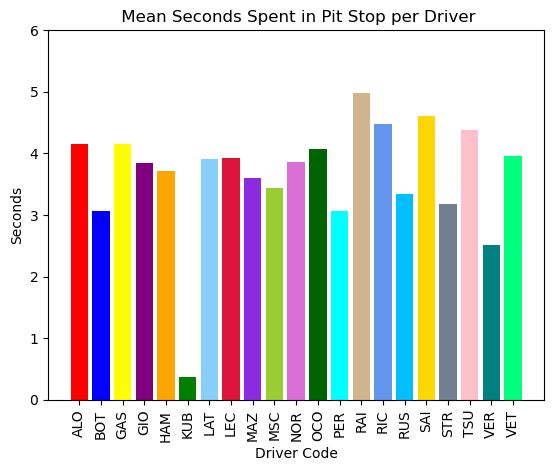

In [192]:
# Plot drivers against their pit stop times 
drivers = ['ALO', 'BOT', 'GAS', 'GIO', 'HAM', 'KUB', 'LAT', 'LEC', 'MAZ', 'MSC', 'NOR',  'OCO', 'PER', 'RAI', 'RIC', 'RUS', 'SAI', 'STR','TSU','VER','VET'] 

plt.bar(drivers, df4, align='center', color = ['red', 'blue', 'yellow', 'purple', 'orange', 'green', 'lightskyblue',
                                              'crimson', 'blueviolet', 'yellowgreen', 'orchid', 'darkgreen', 
                                              'cyan', 'tan', 'cornflowerblue', 'deepskyblue', 'gold', 'slategray',
                                              'pink', 'teal', 'springgreen'])
plt.xticks(rotation='vertical')
plt.title(' Mean Seconds Spent in Pit Stop per Driver')
plt.ylabel('Seconds')
plt.ylim(0,6)
plt.xlabel('Driver Code')
plt.grid

## This might look better the other way

<function matplotlib.pyplot.show(close=None, block=None)>

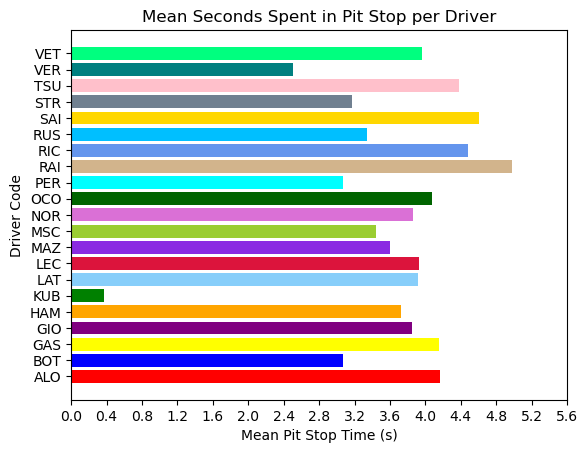

In [193]:
# Take 2
drivers = ['ALO', 'BOT', 'GAS', 'GIO', 'HAM', 'KUB', 'LAT', 'LEC', 'MAZ', 'MSC', 'NOR',  'OCO', 'PER', 'RAI', 'RIC', 'RUS', 'SAI', 'STR','TSU','VER','VET'] 

plt.barh(drivers, df4, align='center', color = ['red', 'blue', 'yellow', 'purple', 'orange', 'green', 'lightskyblue',
                                              'crimson', 'blueviolet', 'yellowgreen', 'orchid', 'darkgreen', 
                                              'cyan', 'tan', 'cornflowerblue', 'deepskyblue', 'gold', 'slategray',
                                              'pink', 'teal', 'springgreen'])

plt.xticks(np.arange(0, 6, 0.4))
plt.title('Mean Seconds Spent in Pit Stop per Driver')
plt.xlabel('Mean Pit Stop Time (s)')
plt.ylabel('Driver Code')
plt.show

## FIGURE OUT A WAY TO INCLUDE FINISHING POSITION ON THIS BAR CHART

In [166]:
df5 = df3.groupby(['code'])['positionOrder'].mean()
df5

code
ALO    10.200000
BOT     5.657895
GAS     8.300000
GIO    12.954545
HAM     3.177778
KUB    14.500000
LAT    15.138889
LEC     6.472222
MAZ    17.097561
MSC    16.179487
NOR     6.810811
OCO     9.312500
PER     7.243902
RAI    12.151515
RIC     8.945946
RUS    14.216216
SAI     6.444444
STR    11.676471
TSU    11.789474
VER     3.275000
VET    12.928571
Name: positionOrder, dtype: float64

In [167]:
# ?
driver_colors = {
    'ALO':'#6CD3BF',
    'BOT':'#1E5BC6',
    'GAS':'#ED1C24',
    'GIO':'#37BEDD',
    'HAM':'#FF80C7',
    'KUB':'#c82e37',
    'LAT':'#FFD800',
    'LEC':'#F58020',
    'MAZ':'#006EFF',
    'MSC':'#FFB800',
    'NOR':'#b2945e',
    'OCO':'#0b361f',
    'PER':'#FFB800',
    'RAI':'#6E0000',
    'RIC':'#6E0000',
    'RUS':'#B6BABD',
    'SAI':'#F596C8',
    'STR':'#2D826D',
    'TSU':'#B12039',
    'VER':'#4E7C9B',
    'VET':'#2293D1'
}

In [168]:
driver_colors = {
    'ALO': 'red',
    'BOT': 'green'
}

In [169]:
driver_colors

{'ALO': 'red', 'BOT': 'green'}

In [170]:
df5

code
ALO    10.200000
BOT     5.657895
GAS     8.300000
GIO    12.954545
HAM     3.177778
KUB    14.500000
LAT    15.138889
LEC     6.472222
MAZ    17.097561
MSC    16.179487
NOR     6.810811
OCO     9.312500
PER     7.243902
RAI    12.151515
RIC     8.945946
RUS    14.216216
SAI     6.444444
STR    11.676471
TSU    11.789474
VER     3.275000
VET    12.928571
Name: positionOrder, dtype: float64

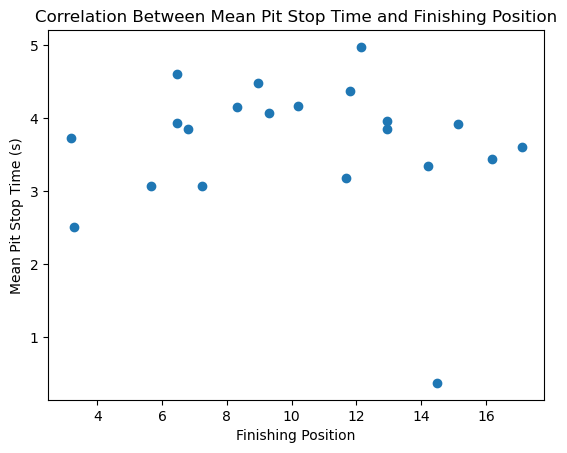

In [177]:
#df4 is drivers grouped by code and mean seconds, df5 drivers grouped by mean position order 
x = df5
y = df4
plt.scatter(x, y)
plt.title('Correlation Between Mean Pit Stop Time and Finishing Position')
plt.xlabel("Finishing Position")
plt.ylabel('Mean Pit Stop Time (s)')

plt.show()

In [172]:
# Run a linear regression on the scatter chart above
#(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x,y)

regress_values = x * slope + intercept

#create line equation
line_eq = 'y = ' + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Print line equation
print(line_eq)

y = -0.02x + 3.86


The r-value is: 0.008388156908246831


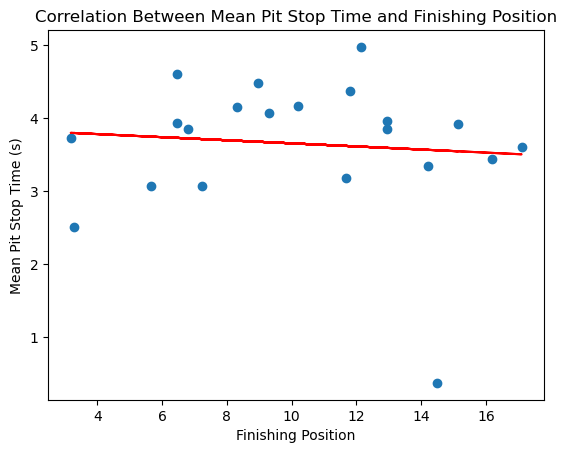

In [178]:
#plt.plot(x_values_north, regress_values_north, "r")

x = df5
y = df4
plt.scatter(x, y)
plt.plot(x, regress_values, "r")
plt.annotate(line_eq, (10,5000), fontsize=15, color='r')
plt.title('Correlation Between Mean Pit Stop Time and Finishing Position')
plt.xlabel("Finishing Position")
plt.ylabel('Mean Pit Stop Time (s)')

#Print the r value
print(f"The r-value is: {rvalue**2}")

plt.show()

In [ ]:
#How would a bar chart look?
#x = df5
#y = df4
#plt.bar(x, y)
#plt.show()

In [62]:
# df3 = results, pit stops, and drivers 
df3 = df3.rename(columns={"driverId_x": "driverId"})

In [63]:
df3 = pd.merge(df3, drivers, on="driverId",how="left")
df3

,resultId,raceId,driverId,constructorId,number_x,grid,position,positionText,positionOrder,points,...,driverName_x,driverRef_y,number,code_y,forename_y,surname_y,dob_y,driverNationality_y,driverUrl_y,driverName_y
0,24970,1052,815,9,11,0,5,5,5,10.0,...,Sergio Pérez,perez,11,PER,Sergio,Pérez,1990-01-26,Mexican,http://en.wikipedia.org/wiki/Sergio_P%C3%A9rez,Sergio Pérez
1,24982,1052,842,213,10,5,17,17,17,0.0,...,Pierre Gasly,gasly,10,GAS,Pierre,Gasly,1996-02-07,French,http://en.wikipedia.org/wiki/Pierre_Gasly,Pierre Gasly
2,24984,1052,4,214,14,9,NaN,R,19,0.0,...,Fernando Alonso,alonso,14,ALO,Fernando,Alonso,1981-07-29,Spanish,http://en.wikipedia.org/wiki/Fernando_Alonso,Fernando Alonso
3,24969,1052,846,1,4,7,4,4,4,12.0,...,Lando Norris,norris,4,NOR,Lando,Norris,1999-11-13,British,http://en.wikipedia.org/wiki/Lando_Norris,Lando Norris
4,24971,1052,844,6,16,4,6,6,6,8.0,...,Charles Leclerc,leclerc,16,LEC,Charles,Leclerc,1997-10-16,Monegasque,http://en.wikipedia.org/wiki/Charles_Leclerc,Charles Leclerc
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,25398,1073,840,117,18,13,13,13,13,0.0,...,Lance Stroll,stroll,18,STR,Lance,Stroll,1998-10-29,Canadian,http://en.wikipedia.org/wiki/Lance_Stroll,Lance Stroll
764,25400,1073,815,9,11,4,15,15,15,0.0,...,Sergio Pérez,perez,11,PER,Sergio,Pérez,1990-01-26,Mexican,http://en.wikipedia.org/wiki/Sergio_P%C3%A9rez,Sergio Pérez
765,25399,1073,854,210,47,19,14,14,14,0.0,...,Mick Schumacher,mick_schumacher,47,MSC,Mick,Schumacher,1999-03-22,German,http://en.wikipedia.org/wiki/Mick_Schumacher,Mick Schumacher
766,25389,1073,852,213,22,8,4,4,4,12.0,...,Yuki Tsunoda,tsunoda,22,TSU,Yuki,Tsunoda,2000-05-11,Japanese,http://en.wikipedia.org/wiki/Yuki_Tsunoda,Yuki Tsunoda


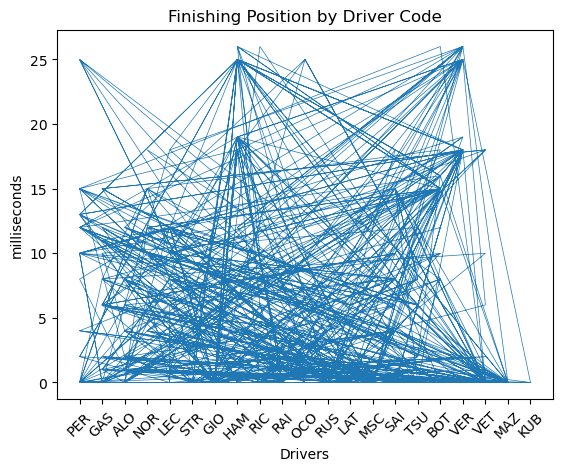

In [145]:
# Graph driver code against their finishing positions
code = df3["code"]
time = df3["points"]  

plt.title('Finishing Position by Driver Code')
plt.plot(code, time,linewidth=0.5,)
plt.xlabel('Drivers')
plt.ylabel('milliseconds')
plt.xticks(rotation=45)
plt.show()

In [ ]:
df5 = df3.groupby('code')['points']
df5.count()

In [ ]:
code = df3["code"]
time = df3["points"].count()

plt.title('Pitstop Time by Driver')
plt.plot(code, time,linewidth=3,)
plt.xlabel('Drivers')
plt.ylabel('milliseconds')
plt.xticks(rotation=45)
plt.show()

In [ ]:
df4 = df3.groupby('code').describe()
df4

In [ ]:
df5.describe()

In [ ]:
HAM = df3[(df3['code'] == 'HAM')]
ALO = df3[(df3['code'] == 'ALO')]
BOT = df3[(df3['code'] == 'BOT')]
GAS = df3[(df3['code'] == 'GAS')]
GIO = df3[(df3['code'] == 'GIO')]
KUB = df3[(df3['code'] == 'KUB')]
LAT = df3[(df3['code'] == 'LAT')]
LEC = df3[(df3['code'] == 'LEC')]
MAZ = df3[(df3['code'] == 'MAZ')]
MSC = df3[(df3['code'] == 'MSC')]
NOR = df3[(df3['code'] == 'NOR')]
OCO = df3[(df3['code'] == 'OCO')]
PER = df3[(df3['code'] == 'PER')]
RAI = df3[(df3['code'] == 'RAI')]
RIC = df3[(df3['code'] == 'RIC')]
RUS = df3[(df3['code'] == 'RUS')]
SAI = df3[(df3['code'] == 'SAI')]
STR = df3[(df3['code'] == 'STR')]
TSU = df3[(df3['code'] == 'TSU')]
VER = df3[(df3['code'] == 'VER')]
VET = df3[(df3['code'] == 'VET')]
HAM

In [ ]:
HAM = HAM['milliseconds_y']
HAM

In [ ]:
ALO = ALO['milliseconds_y']
BOT = BOT['milliseconds_y']
GAS = GAS['milliseconds_y']
GIO = GIO['milliseconds_y']
KUB = KUB['milliseconds_y']
LAT = LAT['milliseconds_y']
LEC = LEC['milliseconds_y']
MAZ = MAZ['milliseconds_y']
MSC = MSC['milliseconds_y']
NOR = NOR['milliseconds_y']
OCO = OCO['milliseconds_y']
PER = PER['milliseconds_y']
RAI = RAI['milliseconds_y']
RIC = RIC['milliseconds_y']
RUS = RUS['milliseconds_y']
SAI = SAI['milliseconds_y']
STR = STR['milliseconds_y']
TSU = TSU['milliseconds_y']
VER = VER['milliseconds_y']
VET = VET['milliseconds_y']

In [ ]:
plot = [HAM, ALO, BOT, GAS, GIO, KUB, LAT, LEC, MAZ, MSC, NOR, OCO, PER, RAI, RIC, RUS, SAI, STR, TSU, VER, VET]
drivers = ["HAM", "ALO", "BOT", "GAS", "GIO", "KUB", "LAT", "LEC", "MAZ", "MSC", "NOR", "OCO", "PER", "RAI", "RIC", "RUS", "SAI", "STR", "TSU", "VER", "VET"]

fig1, ax1 = plt.subplots(figsize=(15, 10))
ax1.set_title('Driver Pit Times',fontsize =20)
ax1.set_ylabel('Milliseconds',fontsize = 15)
ax1.set_xlabel('Drivers',fontsize = 15)
ax1.boxplot(plot, 0, labels=drivers, widths = 0.4, patch_artist=True,vert=True)
ax1.set_ylim(21500,22500)

plt.show()

In [ ]:
plot = [HAM['milliseconds_y'].count()]
Regimen = ["HAM"]
fig1, ax1 = plt.subplots(figsize=(15, 10))
ax1.set_title('Driver Pit Times',fontsize =20)
ax1.set_ylabel('Milliseconds',fontsize = 15)
ax1.set_xlabel('Drivers',fontsize = 15)
ax1.boxplot(plot, 0, labels=Regimen, widths = 0.4, patch_artist=True,vert=True)


plt.show()

In [ ]:
df2_line = df2["driverId"]
pit = df2["milliseconds"]

plt.title('Pit Time by Driver')
plt.plot(df2_line, pit,linewidth=3,)
plt.xlabel('Driver ID')
plt.ylabel('Pit Time')

plt.show()

In [ ]:
df5

In [ ]:
x = df3['code']
y = df3['milliseconds_y']


# Set the xlabel and ylabel, title using class methods
plt.title('Driver by ms')
plt.plot(x, y,linewidth=3,)
plt.xlabel('Driver')
plt.ylabel('Milli')
plt.xticks(rotation=45)

plt.show()

In [ ]:
plot = [df3['driverId']]
Regimen= ['milliseconds_y']

fig1, ax1 = plt.subplots(figsize=(15, 10))
ax1.set_title('Average Pit Stop Time',fontsize =20)
ax1.set_ylabel('Milliseconds',fontsize = 15)
ax1.set_xlabel('Drivers',fontsize = 15)
ax1.boxplot(plot, 0, 'gD', widths = 0.4, patch_artist=True,vert=True)
plt.ylim(600, 1000)
plt.show()

In [ ]:
df3['milliseconds_y'].unique

In [ ]:
df3['milliseconds_y'].isna().sum()